In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np
import random
import math
from tqdm import tqdm

## Tasks 1, 2

Функция генерации выборки с первой практики

In [2]:
def generate_n_random_numbers(N: int, distribution: str):
    """
    N - size of sample
    distribution - ["Uniform[0, 1]", "Uniform[-1, 1]", "2xUniform[-1, 1]", "3xUniform[-1, 1]", "Cauchy(0, 1)", Norm(0, 1)]
    """
    match distribution:
        case "Uniform[0, 1]":
            return [random.uniform(0, 1) for _ in range(N)]
        case "Uniform[-1, 1]":
            return [random.uniform(0, 1) * 2 - 1 for _ in range(N)]
        case "2xUniform[-1, 1]":
            t = generate_n_random_numbers(2 * N, "Uniform[-1, 1]")
            return [t[2 * i] + t[2 * i + 1] for i in range(N)]
        case "3xUniform[-1, 1]":
            t = generate_n_random_numbers(3 * N, "Uniform[-1, 1]")
            return [t[3 * i] + t[3 * i + 1] + t[3 * i + 2] for i in range(N)]
        case "Cauchy(0, 1)":
            t = generate_n_random_numbers(N, "Uniform[0, 1]")
            return list(map(lambda x: math.tan(math.pi * (x - 0.5)), t))
        case "Norm(0, 1)":
            return [random.normalvariate(0, 1) for _ in range(N)]
        case _:
            return []

In [3]:
P = 0.95
PERCENTILE = ((1 - P) / 2) * 100
ANALYTICAL_EXPECTATION = 0
ITERATIONS = 10 ** 3
BOOTSTRAP_SIZE = 1000
# NS = [10, 100, 500]
min_sample_size = 40
max_sample_size = 2000
num_of_sample_sizes = 10
NS = list(map(int, np.logspace(base=5, start=math.log(min_sample_size, 5), stop=math.log(max_sample_size, 5), num=num_of_sample_sizes)))
print(NS)

[40, 61, 95, 147, 227, 351, 542, 838, 1294, 2000]


Функция подсчёта доверительного интервала (1)

In [4]:
def calculate_c_star(x: list):
    return sum(x) / len(x)

In [5]:
def confidence_interval_1(sample: list, sigma_squared: float) -> tuple:
    quantil = sps.norm(loc=0, scale=1).ppf((1 + P) / 2)
    term = quantil * math.sqrt(sigma_squared) / math.sqrt(len(sample))
    c_star = calculate_c_star(sample)
    return (c_star - term, c_star + term)

Функция подсчёта доверительного интервала (2)

In [6]:
def calculate_sigma_star(x: list):
    c_star = calculate_c_star(x)
    return math.sqrt(sum([pow(xi - c_star, 2) for xi in x]) / (len(x) - 1))

In [7]:
def confidence_interval_2(sample: list) -> tuple:
    n = len(sample)
    c_star = calculate_c_star(sample)
    term = sps.t.ppf((1 + P) / 2, n - 1) * calculate_sigma_star(sample) / math.sqrt(n) 
    return (c_star - term, c_star + term)

Функция подсчёта доверительного интервала (3)

In [8]:
def calculate_D_coef(n: int, p: float) -> float:
    return math.sqrt(-(math.log((1 - p) / 2) / (2 * n))) - (1 / (6 * n))

In [9]:
def confidence_interval_3(sample: list, shift=0) -> tuple:
    n = len(sample)
    sample = sorted(sample)
    a, b = sample[shift], sample[-shift - 1]
    c_star = calculate_c_star(sample)
    term = (b - a) * calculate_D_coef(n, P)
    return (c_star - term, c_star + term)

Сгенерируем по $10^4$ выборок разных размеров для каждого распределения и проверим, какая доля из них будет попадать в доверительный интервал, подсчитанный каждым из трёх методов

In [10]:
distros = ["Uniform[-1, 1]", "Norm(0, 1)", "2xUniform[-1, 1]"]
sigma_squared = {"Uniform[-1, 1]": 1 / 3,
                 "Norm(0, 1)": 1,
                 "2xUniform[-1, 1]": 2 / 3}

In [11]:
print("Start generating samples...")
samples = {d: [[generate_n_random_numbers(n, d) for _ in range(ITERATIONS)]
                for n in NS] for d in tqdm(distros)}
print("Samples generated.")

Start generating samples...


100%|██████████| 3/3 [00:08<00:00,  2.97s/it]

Samples generated.


Distribution Uniform[-1, 1], samples size = 40


100%|██████████| 1000/1000 [00:00<00:00, 1228.96it/s]


Distribution Uniform[-1, 1], samples size = 61


100%|██████████| 1000/1000 [00:00<00:00, 1429.17it/s]


Distribution Uniform[-1, 1], samples size = 95


100%|██████████| 1000/1000 [00:00<00:00, 1484.72it/s]


Distribution Uniform[-1, 1], samples size = 147


100%|██████████| 1000/1000 [00:00<00:00, 1394.77it/s]


Distribution Uniform[-1, 1], samples size = 227


100%|██████████| 1000/1000 [00:00<00:00, 1480.01it/s]


Distribution Uniform[-1, 1], samples size = 351


100%|██████████| 1000/1000 [00:00<00:00, 1294.09it/s]


Distribution Uniform[-1, 1], samples size = 542


100%|██████████| 1000/1000 [00:00<00:00, 1257.88it/s]


Distribution Uniform[-1, 1], samples size = 838


100%|██████████| 1000/1000 [00:00<00:00, 1135.08it/s]


Distribution Uniform[-1, 1], samples size = 1294


100%|██████████| 1000/1000 [00:00<00:00, 1029.75it/s]


Distribution Uniform[-1, 1], samples size = 2000


100%|██████████| 1000/1000 [00:01<00:00, 795.44it/s]


Results for distribution Uniform[-1, 1]
[0.947, 0.947, 0.947, 0.951, 0.942, 0.959, 0.942, 0.942, 0.962, 0.945] (1)
[0.949, 0.948, 0.953, 0.955, 0.943, 0.957, 0.939, 0.942, 0.962, 0.943] (2)
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] (3)
----------------------------------------
Distribution Norm(0, 1), samples size = 40


100%|██████████| 1000/1000 [00:00<00:00, 1303.66it/s]


Distribution Norm(0, 1), samples size = 61


100%|██████████| 1000/1000 [00:00<00:00, 1255.23it/s]


Distribution Norm(0, 1), samples size = 95


100%|██████████| 1000/1000 [00:00<00:00, 1433.29it/s]


Distribution Norm(0, 1), samples size = 147


100%|██████████| 1000/1000 [00:00<00:00, 1395.97it/s]


Distribution Norm(0, 1), samples size = 227


100%|██████████| 1000/1000 [00:00<00:00, 1366.88it/s]


Distribution Norm(0, 1), samples size = 351


100%|██████████| 1000/1000 [00:00<00:00, 1331.12it/s]


Distribution Norm(0, 1), samples size = 542


100%|██████████| 1000/1000 [00:00<00:00, 1296.36it/s]


Distribution Norm(0, 1), samples size = 838


100%|██████████| 1000/1000 [00:00<00:00, 1203.04it/s]


Distribution Norm(0, 1), samples size = 1294


100%|██████████| 1000/1000 [00:00<00:00, 1075.72it/s]


Distribution Norm(0, 1), samples size = 2000


100%|██████████| 1000/1000 [00:01<00:00, 935.17it/s]


Results for distribution Norm(0, 1)
[0.945, 0.949, 0.957, 0.958, 0.949, 0.955, 0.946, 0.952, 0.951, 0.952] (1)
[0.944, 0.957, 0.957, 0.958, 0.954, 0.955, 0.947, 0.953, 0.95, 0.951] (2)
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] (3)
----------------------------------------
Distribution 2xUniform[-1, 1], samples size = 40


100%|██████████| 1000/1000 [00:00<00:00, 1560.92it/s]


Distribution 2xUniform[-1, 1], samples size = 61


100%|██████████| 1000/1000 [00:00<00:00, 1475.24it/s]


Distribution 2xUniform[-1, 1], samples size = 95


100%|██████████| 1000/1000 [00:00<00:00, 1502.79it/s]


Distribution 2xUniform[-1, 1], samples size = 147


100%|██████████| 1000/1000 [00:00<00:00, 1457.71it/s]


Distribution 2xUniform[-1, 1], samples size = 227


100%|██████████| 1000/1000 [00:00<00:00, 1408.63it/s]


Distribution 2xUniform[-1, 1], samples size = 351


100%|██████████| 1000/1000 [00:00<00:00, 1404.11it/s]


Distribution 2xUniform[-1, 1], samples size = 542


100%|██████████| 1000/1000 [00:00<00:00, 1305.34it/s]


Distribution 2xUniform[-1, 1], samples size = 838


100%|██████████| 1000/1000 [00:00<00:00, 1120.89it/s]


Distribution 2xUniform[-1, 1], samples size = 1294


100%|██████████| 1000/1000 [00:00<00:00, 1100.11it/s]


Distribution 2xUniform[-1, 1], samples size = 2000


100%|██████████| 1000/1000 [00:01<00:00, 900.07it/s]


Results for distribution 2xUniform[-1, 1]
[0.957, 0.955, 0.947, 0.958, 0.948, 0.94, 0.952, 0.948, 0.941, 0.952] (1)
[0.953, 0.958, 0.947, 0.955, 0.949, 0.938, 0.954, 0.947, 0.94, 0.953] (2)
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] (3)
----------------------------------------


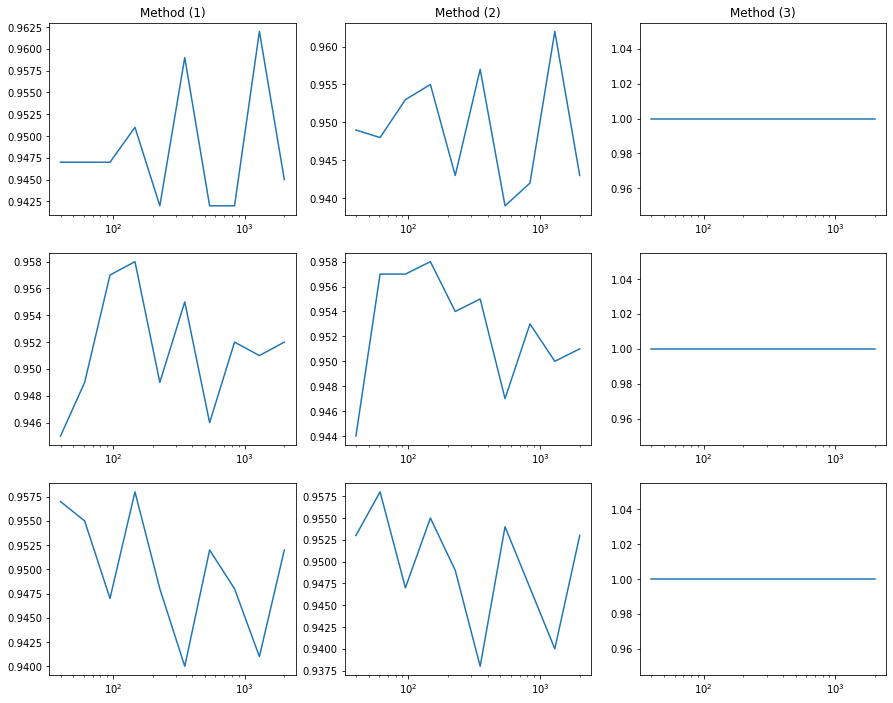

In [12]:
_, axis = plt.subplots(3, 3, figsize=(15, 12))
task_2_results_a = {d: {method: {} for method in range(3)} for d in distros}
task_2_results_b = {d: {method: {} for method in range(3)} for d in distros}
for i, d in enumerate(distros):
    results_1 = []
    results_2 = []
    results_3 = []
    for n_id, n in enumerate(NS):
        hits_counter_1 = 0
        hits_counter_2 = 0
        hits_counter_3 = 0
        print(f"Distribution {d}, samples size = {n}")
        average_d_left = [0] * 3
        average_d_right = [0] * 3
        for sample in tqdm(samples[d][n_id]):
            d_left_1, d_right_1 = confidence_interval_1(sample, sigma_squared[d])
            hits_counter_1 += d_left_1 <= ANALYTICAL_EXPECTATION <= d_right_1
            average_d_left[0] += d_left_1
            average_d_right[0] += d_right_1

            d_left_2, d_right_2 = confidence_interval_2(sample)
            hits_counter_2 += d_left_2 <= ANALYTICAL_EXPECTATION <= d_right_2
            average_d_left[1] += d_left_2
            average_d_right[1] += d_right_2

            d_left_3, d_right_3 = confidence_interval_3(sample)
            hits_counter_3 += d_left_3 <= ANALYTICAL_EXPECTATION <= d_right_3
            average_d_left[2] += d_left_3
            average_d_right[2] += d_right_3

        results_1.append(hits_counter_1 / ITERATIONS)
        results_2.append(hits_counter_2 / ITERATIONS)
        results_3.append(hits_counter_3 / ITERATIONS)

        average_d_left = np.array(average_d_left) / len(samples[d][n_id])
        average_d_right = np.array(average_d_right) / len(samples[d][n_id])

        for method in range(3):
            task_2_results_a[d][method][n] = average_d_left[method]
            task_2_results_b[d][method][n] = average_d_right[method]

    print(f"Results for distribution {d}\n"
            f"{results_1} (1)\n"
            f"{results_2} (2)\n"
            f"{results_3} (3)\n", '-' * 40, sep='')
    axis[i][0].plot(NS, results_1)
    axis[i][1].plot(NS, results_2)
    axis[i][2].plot(NS, results_3)
    axis[i][0].set_xscale('log')
    axis[i][1].set_xscale('log')
    axis[i][2].set_xscale('log')

axis[0][0].title.set_text("Method (1)")
axis[0][1].title.set_text("Method (2)")
axis[0][2].title.set_text("Method (3)")
plt.show()

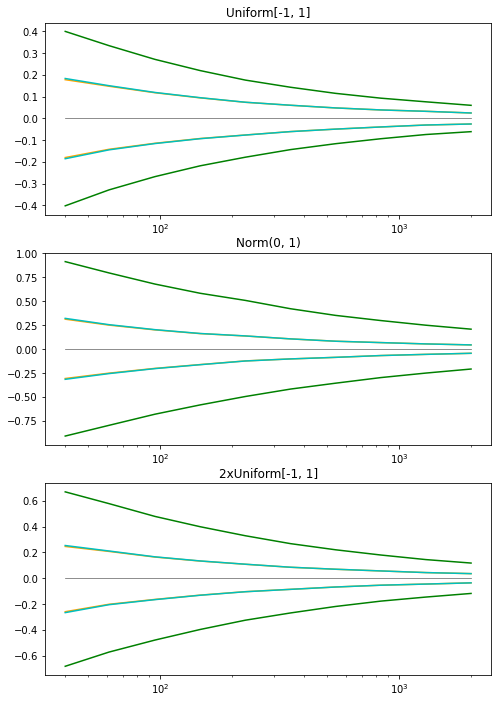

In [13]:
figure, axis = plt.subplots(3, 1, figsize=(8, 12))
method_colors = {0: "orange", 1: "c", 2: "green"}
for id, d in enumerate(distros):
    for method in range(3):
        axis[id].plot(NS, task_2_results_a[d][method].values(), color=method_colors[method])
        axis[id].plot(NS, task_2_results_b[d][method].values(), color=method_colors[method])
        axis[id].set_xscale('log')
        axis[id].plot(NS, [0] * len(NS), color='gray', linewidth=0.5)
        axis[id].title.set_text(d)

На графиках изображена зависимость границ доверительного интервала от размера выборки $n$. Как и следовало ожидать, интервал самый широкий для непараметрического метода 3 (обозначен зелёным). Границы же интервалов 1 и 2 методов достаточно близки друг к другу.

## Task 3

Испортим наши выборки, добавив к ним по одному элементу порядка $10^2$

In [14]:
samples_bad = {d: [[list(np.concatenate([samples[d][n_id][sample_id], [100.0]])) for sample_id in range(ITERATIONS)]
                for n_id in range(len(NS))] for d in distros}
print((samples_bad["2xUniform[-1, 1]"][0][0]))

[0.7300982030959846, 0.9280436091463447, -0.282419951604314, 0.38248032790642483, -1.3066809908218509, -1.1080754917502345, 1.3110543198023896, 0.8525179371641156, 1.1936713441046976, 0.7080455981965601, 0.07299123344966563, -0.7500447201248581, -1.0640067588460351, -0.6450965972304645, 0.23181021013026903, -0.5367769751091886, -0.20678677132672263, 0.33938255399831574, -0.6393965755915092, -1.920290906168047, -0.6070931985702785, -1.00759697475113, -1.0197865532176018, -0.1222546847300181, 0.45431580606330524, 0.701852886881138, -0.8138686621464319, 0.8907661459500062, 1.0381687272722508, -0.20123013593323646, 0.5577420991290332, -0.14792245914933022, 0.6156151447226188, 0.16681494662639507, -0.8601426523099636, -1.2912036725804303, 1.3309571544531604, 1.0936301748642852, 0.5961097014521295, 0.03981031482386488, 100.0]


Повторим с этими выборками те же действия

In [15]:
task_3_results_a = {d: {method: {} for method in range(3)} for d in distros}
task_3_results_b = {d: {method: {} for method in range(3)} for d in distros}
for i, d in enumerate(distros):
    for n_id, n in enumerate(NS):
        print(f"Distribution {d}, samples size = {n + 1}")
        average_d_left = [0] * 3
        average_d_right = [0] * 3
        for sample in tqdm(samples_bad[d][n_id]):
            d_left_1, d_right_1 = confidence_interval_1(sample, sigma_squared[d])
            average_d_left[0] += d_left_1
            average_d_right[0] += d_right_1

            d_left_2, d_right_2 = confidence_interval_2(sample)
            average_d_left[1] += d_left_2
            average_d_right[1] += d_right_2

            d_left_3, d_right_3 = confidence_interval_3(sample, shift=2)
            average_d_left[2] += d_left_3
            average_d_right[2] += d_right_3

        average_d_left = np.array(average_d_left) / len(samples[d][n_id])
        average_d_right = np.array(average_d_right) / len(samples[d][n_id])

        for method in range(3):
            task_3_results_a[d][method][n] = average_d_left[method]
            task_3_results_b[d][method][n] = average_d_right[method]

Distribution Uniform[-1, 1], samples size = 41


100%|██████████| 1000/1000 [00:00<00:00, 1255.41it/s]


Distribution Uniform[-1, 1], samples size = 62


100%|██████████| 1000/1000 [00:00<00:00, 1245.95it/s]


Distribution Uniform[-1, 1], samples size = 96


100%|██████████| 1000/1000 [00:00<00:00, 1329.07it/s]


Distribution Uniform[-1, 1], samples size = 148


100%|██████████| 1000/1000 [00:00<00:00, 1221.56it/s]


Distribution Uniform[-1, 1], samples size = 228


100%|██████████| 1000/1000 [00:00<00:00, 1151.61it/s]


Distribution Uniform[-1, 1], samples size = 352


100%|██████████| 1000/1000 [00:00<00:00, 1118.42it/s]


Distribution Uniform[-1, 1], samples size = 543


100%|██████████| 1000/1000 [00:01<00:00, 999.53it/s]


Distribution Uniform[-1, 1], samples size = 839


100%|██████████| 1000/1000 [00:01<00:00, 870.76it/s]


Distribution Uniform[-1, 1], samples size = 1295


100%|██████████| 1000/1000 [00:01<00:00, 644.20it/s]


Distribution Uniform[-1, 1], samples size = 2001


100%|██████████| 1000/1000 [00:01<00:00, 541.88it/s]


Distribution Norm(0, 1), samples size = 41


100%|██████████| 1000/1000 [00:00<00:00, 1514.55it/s]


Distribution Norm(0, 1), samples size = 62


100%|██████████| 1000/1000 [00:00<00:00, 1472.78it/s]


Distribution Norm(0, 1), samples size = 96


100%|██████████| 1000/1000 [00:00<00:00, 1442.98it/s]


Distribution Norm(0, 1), samples size = 148


100%|██████████| 1000/1000 [00:00<00:00, 1268.02it/s]


Distribution Norm(0, 1), samples size = 228


100%|██████████| 1000/1000 [00:00<00:00, 1258.04it/s]


Distribution Norm(0, 1), samples size = 352


100%|██████████| 1000/1000 [00:00<00:00, 1097.17it/s]


Distribution Norm(0, 1), samples size = 543


100%|██████████| 1000/1000 [00:01<00:00, 945.12it/s]


Distribution Norm(0, 1), samples size = 839


100%|██████████| 1000/1000 [00:01<00:00, 661.26it/s]


Distribution Norm(0, 1), samples size = 1295


100%|██████████| 1000/1000 [00:01<00:00, 514.57it/s]


Distribution Norm(0, 1), samples size = 2001


100%|██████████| 1000/1000 [00:01<00:00, 522.50it/s]


Distribution 2xUniform[-1, 1], samples size = 41


100%|██████████| 1000/1000 [00:00<00:00, 1473.17it/s]


Distribution 2xUniform[-1, 1], samples size = 62


100%|██████████| 1000/1000 [00:00<00:00, 1463.96it/s]


Distribution 2xUniform[-1, 1], samples size = 96


100%|██████████| 1000/1000 [00:00<00:00, 1469.26it/s]


Distribution 2xUniform[-1, 1], samples size = 148


100%|██████████| 1000/1000 [00:00<00:00, 1423.08it/s]


Distribution 2xUniform[-1, 1], samples size = 228


100%|██████████| 1000/1000 [00:00<00:00, 1240.44it/s]


Distribution 2xUniform[-1, 1], samples size = 352


100%|██████████| 1000/1000 [00:00<00:00, 1175.31it/s]


Distribution 2xUniform[-1, 1], samples size = 543


100%|██████████| 1000/1000 [00:00<00:00, 1030.33it/s]


Distribution 2xUniform[-1, 1], samples size = 839


100%|██████████| 1000/1000 [00:01<00:00, 875.59it/s]


Distribution 2xUniform[-1, 1], samples size = 1295


100%|██████████| 1000/1000 [00:01<00:00, 689.33it/s]


Distribution 2xUniform[-1, 1], samples size = 2001


100%|██████████| 1000/1000 [00:02<00:00, 491.84it/s]


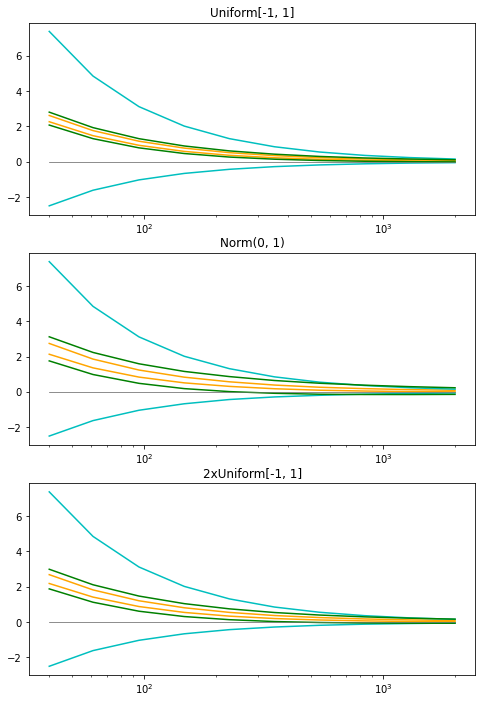

In [16]:
figure, axis = plt.subplots(3, 1, figsize=(8, 12))
method_colors = {0: "orange", 1: "c", 2: "green"}
for id, d in enumerate(distros):
    for method in range(3):
        axis[id].plot(NS, task_3_results_a[d][method].values(), color=method_colors[method])
        axis[id].plot(NS, task_3_results_b[d][method].values(), color=method_colors[method])
        axis[id].set_xscale('log')
        axis[id].plot(NS, [0] * len(NS), color='gray', linewidth=0.5)
        axis[id].title.set_text(d)

## Task 4

Найдём оптимальное значение $k$ для построения интервала (3), такое что реальная доверительная вероятность совпала с $P=0.95$ при $a = X_{(\lfloor kn \rfloor)}, b = X_{(\lceil n- kn \rceil)}$

In [17]:
KS = list(np.arange(0.17, 0.31, 0.001))

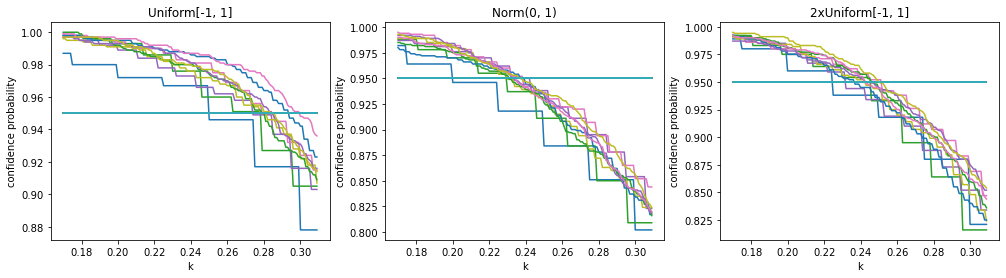

In [18]:
_, axis = plt.subplots(1, 3, figsize=(17, 4))
results = {d: {n: [None] * len(KS) for n in NS} for d in distros}
for i, d in enumerate(distros):
    for n_id, n in enumerate(NS):
        for k_id, k in enumerate(KS):
            hits_counter = 0
            for sample in samples[d][n_id]:
                d_left, d_right = confidence_interval_3(sample, shift=int(k*n))
                hits_counter += d_left <= ANALYTICAL_EXPECTATION <= d_right

            results[d][n][k_id] = hits_counter / ITERATIONS

        axis[i].plot(KS, results[d][n])
        axis[i].plot(KS, [0.95] * len(KS))
        axis[i].title.set_text(d)
        axis[i].set_xlabel("k")
        axis[i].set_ylabel("confidence probability")
    
plt.show()

Разными цветами для каждого распределния обозначены результаты при различных размерах сэмплов $n$. Посчитаем для каждого графика среднеквадратичное отклонение при каждом $k$.

In [19]:
def RMSD(evaluations: list, target: float) -> float:
    return sum([pow(ev - target, 2) for ev in evaluations]) / len(evaluations)

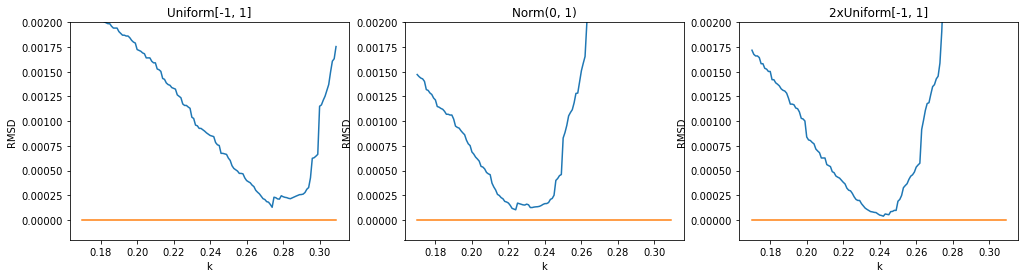

In [20]:
result_rmsd = {d: [RMSD([results[d][cur_n][k_id] for cur_n in NS], P) for k_id in range(len(KS))] for d in distros}
_, axis = plt.subplots(1, 3, figsize=(17, 4))
for i, d in enumerate(distros):
    axis[i].plot(KS, result_rmsd[d])
    axis[i].plot(KS, [0] * len(KS))
    axis[i].title.set_text(d)
    axis[i].set_xlabel("k")
    axis[i].set_ylabel("RMSD")
    axis[i].set_ylim([-0.0002, 0.002])

Усредним для СКО всех трёх распределений и найдём самое оптимальное $k$. 

Best k: 0.244 with an average mean square deviation from target confidence probability P = 0.95 of 0.00035


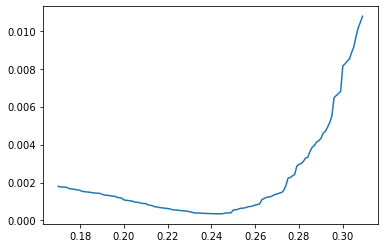

In [21]:
final_result = [np.mean([result_rmsd[d][k_id] for d in distros]) for k_id in range(len(KS))]
min_rmsd = min(final_result)
best_k = [KS[i] for i, v in enumerate(final_result) if v == min_rmsd][0]
print(f"Best k: {best_k:0.3f} with an average mean square deviation from target confidence probability P = {P} of {min_rmsd:.5f}")
plt.plot(KS, final_result)